In [1]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Primary Modules:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis


## Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

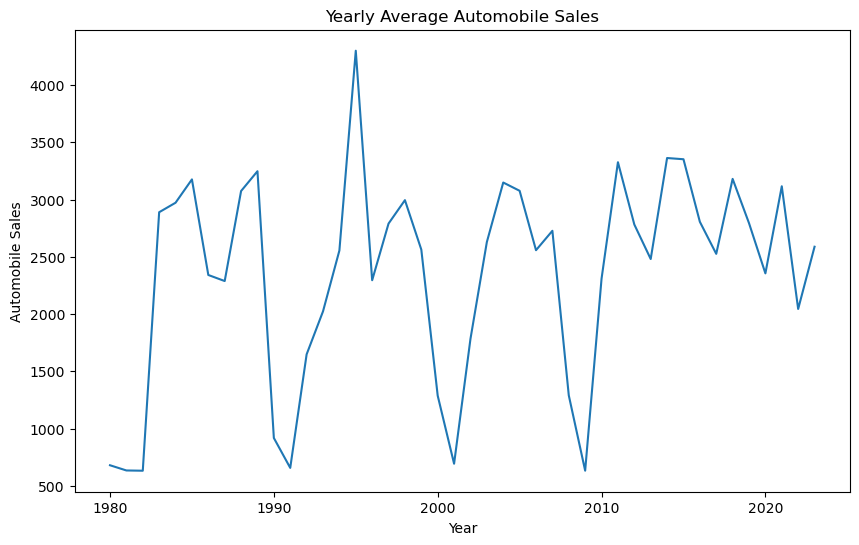

In [9]:
# create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')

# Add labels and title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Automobile Sales')  # Y-axis label
plt.title('Yearly Average Automobile Sales')  # Chart title

# Show the plot
plt.show()

## Plot different lines for categories of vehicle type and analyse the trend. 

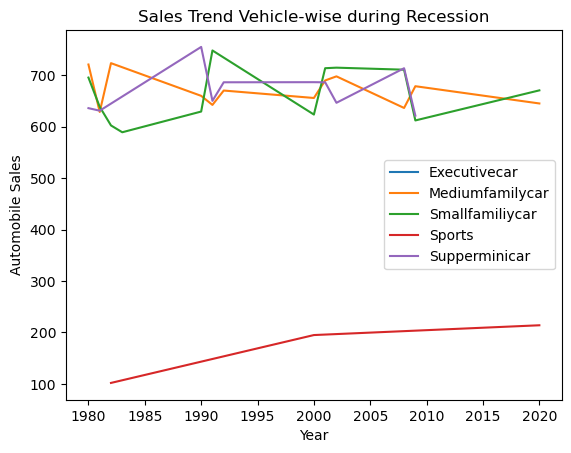

In [11]:
df_rec = df[df['Recession'] == 1]

# Group by Year and Vehicle_Type, calculate the mean Automobile Sales
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Set 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Group by Vehicle_Type and plot the data
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')

# Add labels and title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Automobile Sales')  # Y-axis label
plt.title('Sales Trend Vehicle-wise during Recession')  # Chart title

# Show legend and plot
plt.legend()
plt.show()

From the above plot, we can derive several insights about the sales trends of various vehicle types during a recession:

Sales Decline Across Most Vehicle Types: Most vehicle types show a significant decline in sales during recession periods, likely due to reduced consumer spending.

Differences in Resilience: Some vehicle types may be more resilient to the economic downturn, maintaining more stable sales compared to others. For example, essential or economical vehicle types (like smaller cars) may not see as steep a decline as luxury or less essential vehicles.

Sales Recovery: Depending on the plot, we might observe recovery patterns for some vehicle types, where sales start to rebound toward the end of the recession or after certain years, which can indicate which types of vehicles are purchased first as the economy improves.

Consumer Preferences: The plot may highlight shifting consumer preferences during a recession, with an increase in demand for more fuel-efficient or budget-friendly vehicles compared to high-end, luxury vehicles.

These insights can help manufacturers and dealers understand how different economic conditions impact consumer behavior in the automotive industry.

From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.

## Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

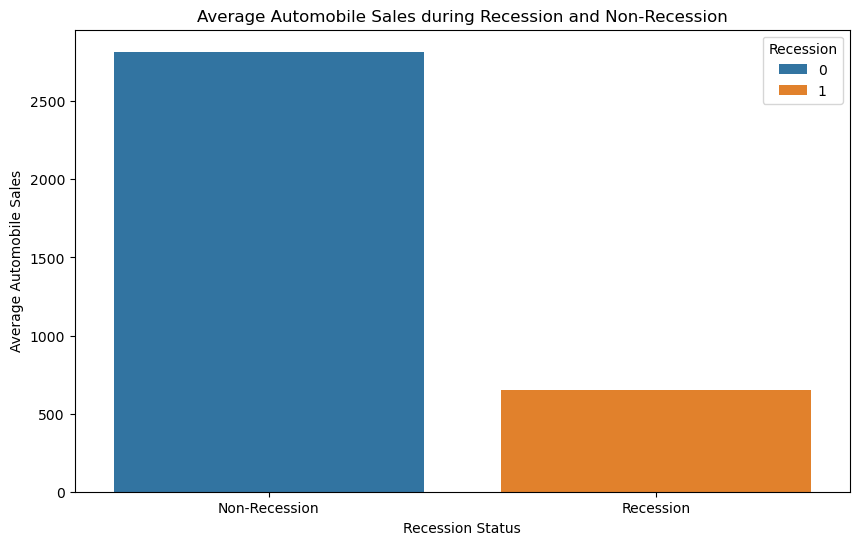

In [15]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession Status')  # Label for x-axis
plt.ylabel('Average Automobile Sales')  # Label for y-axis
plt.title('Average Automobile Sales during Recession and Non-Recession')  # Title of the plot
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])  # Custom ticks for x-axis
plt.show()

Compare the sales of different vehicle types during a recession and a non-recession period using the functionality of Seaborn Library to create this visualization

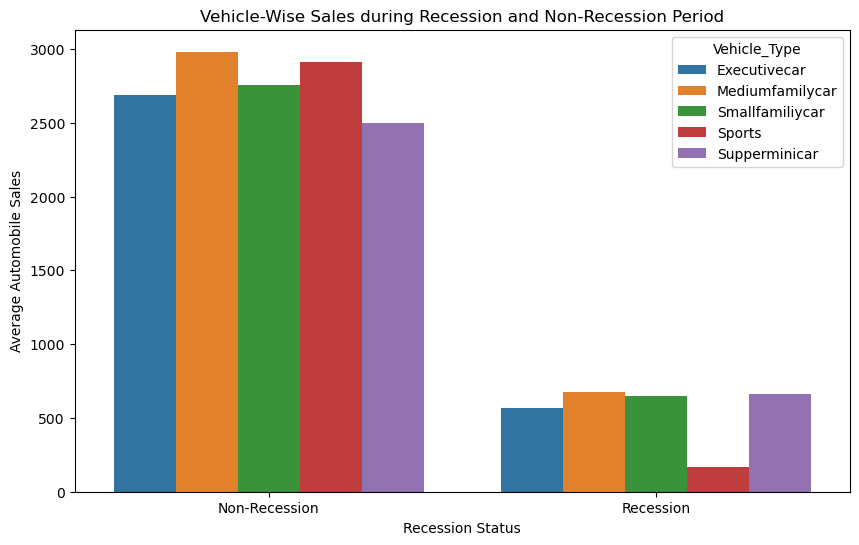

In [17]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])  # Custom ticks for x-axis
plt.xlabel('Recession Status')  # Label for x-axis
plt.ylabel('Average Automobile Sales')  # Label for y-axis
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')  # Title of the plot

plt.show()


From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

## Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

Find more insights from the data to understand the reason.
Plot a two line charts using subplotting to see how did the GDP vary over time during recession and non-recession periods using add_subplot() from Matplotlib. 

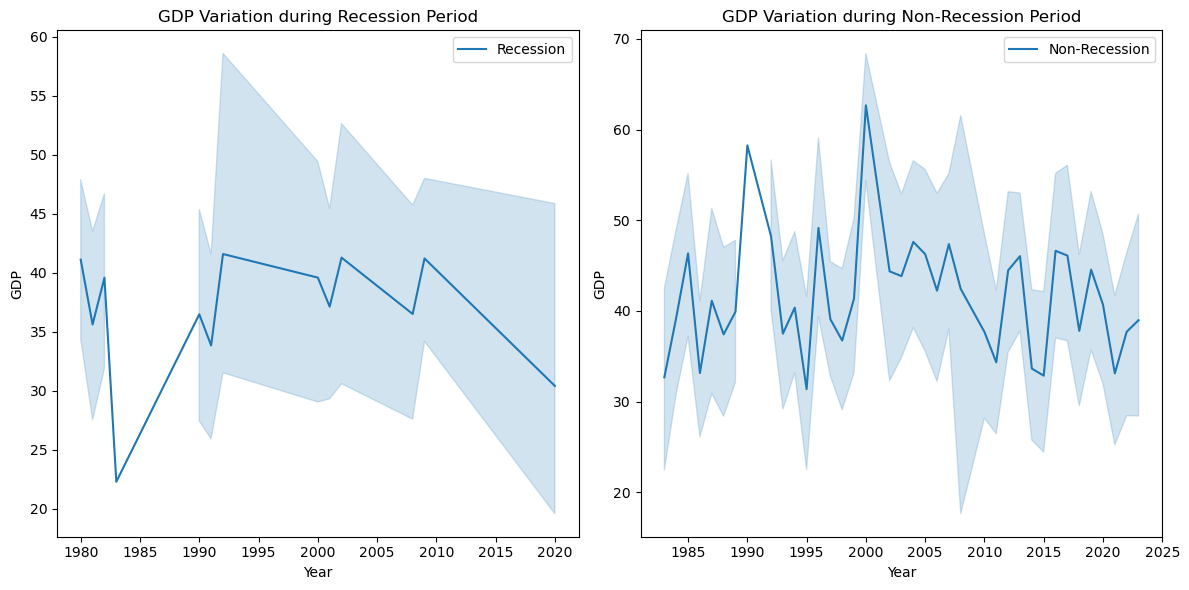

In [20]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig=plt.figure(figsize=(12, 6))

# Create different axes for subplots
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot GDP during recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot GDP during non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company


## Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble
Title this plot as 'Seasonality impact on Automobile Sales'

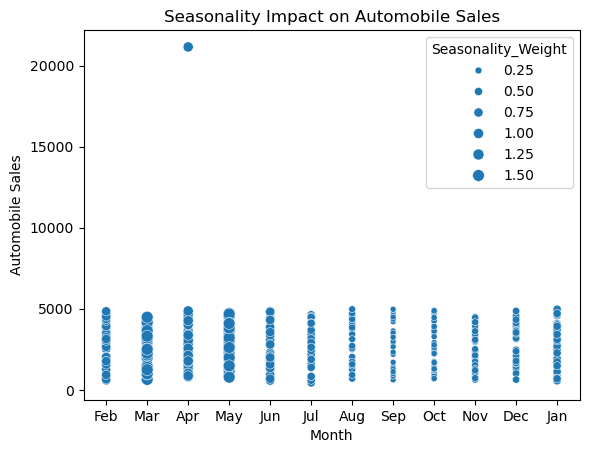

In [23]:
non_rec_data = df[df['Recession'] == 0]

size = non_rec_data['Seasonality_Weight']  # for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

# You can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()


Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April


## Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period.



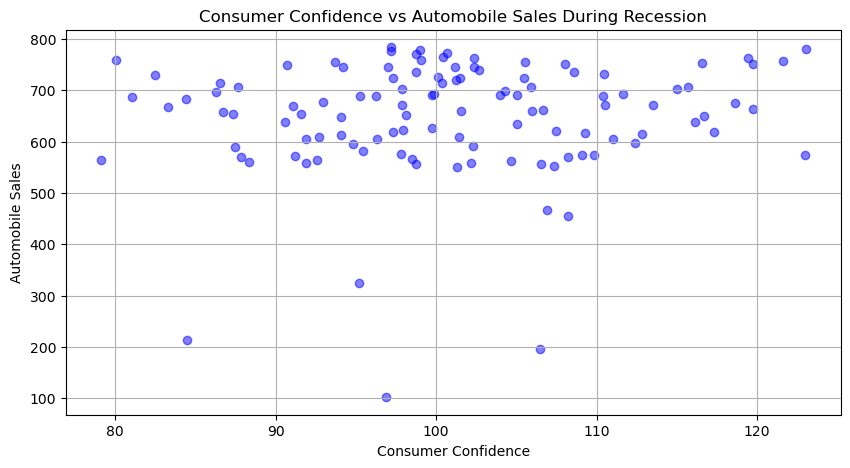

In [26]:
# Scatter plot for consumer confidence vs automobile sales during recessions
plt.figure(figsize=(10, 5))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='blue', alpha=0.5)
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence vs Automobile Sales During Recession')
plt.grid(True)
plt.show()

How does the average vehicle price relate to the sales volume during recessions?

Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

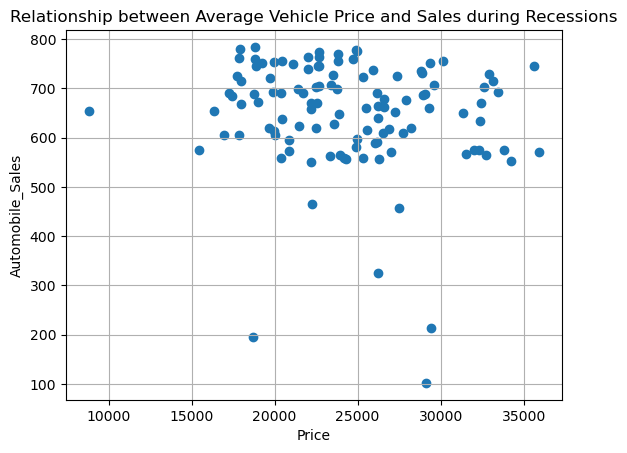

In [28]:
 #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.grid(True)
plt.show()

Inference
There is not much relation.

## Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods.

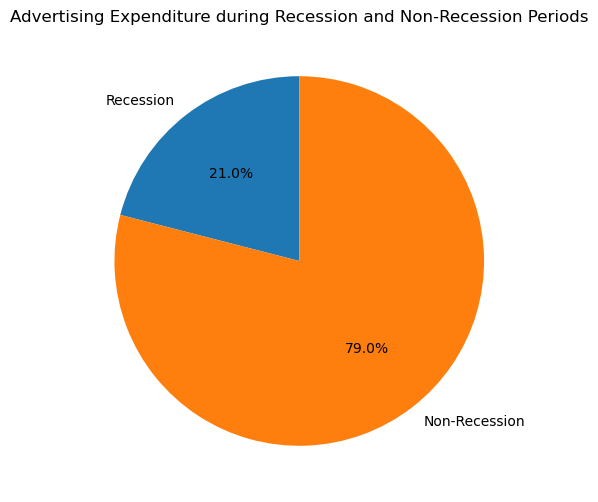

In [31]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

## Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.


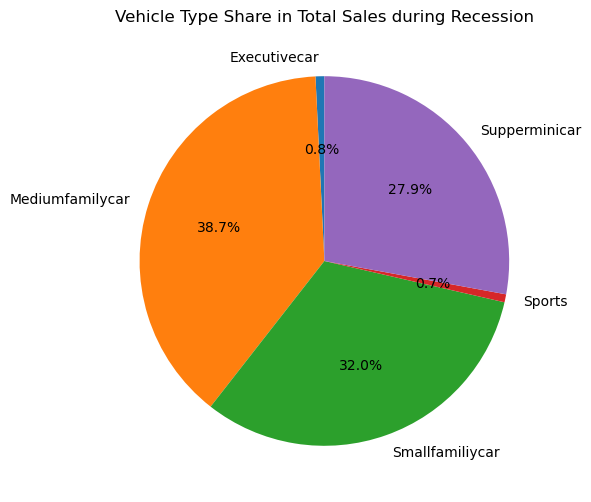

In [34]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Vehicle Type Share in Total Sales during Recession')

plt.show()


During recession the advertisements were mostly focued on low price range vehicle. 

## Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period

Create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

C:\Users\stavr\AppData\Local\Temp\ipykernel_15704\2238087486.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',


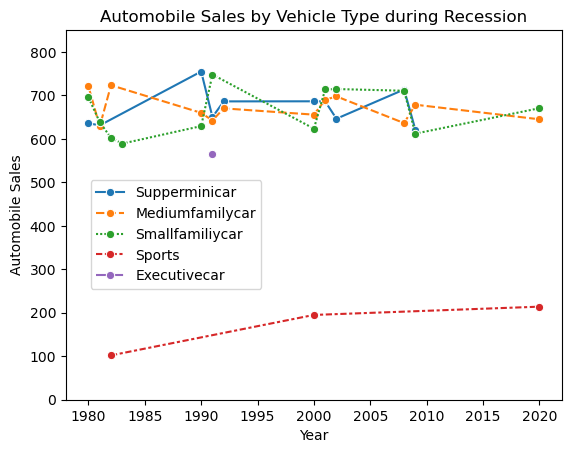

In [37]:
df_rec = df[df['Recession'] == 1]
sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 850)
plt.legend(loc=(0.05, 0.3))
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales by Vehicle Type during Recession')
plt.show()


During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar.